### CS4423 - Networks
Angela Carnevale<br />
School of Mathematical and Statistical Sciences<br />
University of Galway

#### 3. Centrality Measures

# Week 5, lecture 2: Degree and Eigenvector Centrality

#### What is it that makes a node in a network important?

Key actors in a social network can be identified through **centrality measures**. The question of what it means to be central has a number of different answers. Accordingly, in the context of social network analysis, a variety of different centrality measures have been developed.

Here we introduce, in addition to the **degree centrality** that we have already seen, three further measures:

* **eigenvector centrality**, defined in terms of properties of the network’s **adjacency matrix**,

* **closeness centrality**, defined in terms of a nodes **distance** to other nodes on the network,

* **betweenness centrality**, defined in terms of **shortest paths**.

Start by importing the necessary
`python` libraries into this jupyter notebook. In the following, we will make explicit use of `Pandas`, `Numpy` and `yaml`.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import yaml
opts = { "with_labels": True, "node_color": 'y'}

### Degree Centrality

The **degree** of a node is its number of neighbors in the graph.
This number can serve as a simple measure of centrality.

We'll look at a recurring example while discussing the various centrality measures. Consider the following historical network of **florentine families** (from the 13th and 14th centuries), 
linked by **marital ties**.

In [2]:
G = nx.florentine_families_graph()
list(G.nodes())

['Acciaiuoli',
 'Medici',
 'Castellani',
 'Peruzzi',
 'Strozzi',
 'Barbadori',
 'Ridolfi',
 'Tornabuoni',
 'Albizzi',
 'Salviati',
 'Pazzi',
 'Bischeri',
 'Guadagni',
 'Ginori',
 'Lamberteschi']

**Note.** This version of the graph misses the isolated (=degree 0) node `'Pucci'` of the original graph [cf. Latora et al, Chapter 2]. We'll add it by hand. 

In [3]:
G.add_node('Pucci')

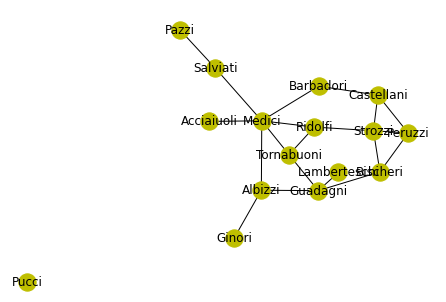

In [4]:
nx.draw(G, **opts)

A reason to look at this example is that in this context, we have further known indicators of the importance of these families (nodes) that we can compare with the node degree (and other centrality measures) in the graph `G`. These were the **wealth**, and the number of seats
on the city council (**priorates**) of each family.

In [5]:
# this dictionary contains data on wealth

wealth = {
  'Acciaiuoli': 10, 'Albizzi': 36, 'Barbadori': 55, 'Bischeri': 44,
  'Castellani': 20, 'Ginori': 32, 'Guadagni': 8, 'Lamberteschi': 42,
  'Medici': 103, 'Pazzi': 48, 'Peruzzi': 49, 'Pucci': 3,
  'Ridolfi': 27, 'Salviati': 10, 'Strozzi': 146, 'Tornabuoni': 48,
}

# this dictionary contains data on political influence

priorates = {
  'Acciaiuoli': 53, 'Albizzi': 65, 'Barbadori': 'n/a', 'Bischeri': 12,
  'Castellani': 22, 'Ginori': 'n/a', 'Guadagni': 21, 'Lamberteschi': 0,
  'Medici': 53, 'Pazzi': 'n/a', 'Peruzzi': 42, 'Pucci': 0,
  'Ridolfi': 38, 'Salviati': 35, 'Strozzi': 74, 'Tornabuoni': 'n/a',
}

In [6]:
nx.set_node_attributes(G, wealth, 'wealth')
nx.set_node_attributes(G, priorates, 'priorates')
nx.set_node_attributes(G, dict(G.degree()), 'degree')

In [7]:
print(dict(G.degree()))

{'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1, 'Pucci': 0}


In [8]:
G.nodes['Pazzi']

{'wealth': 48, 'priorates': 'n/a', 'degree': 1}

In [9]:
dict(G.nodes(data=True))

{'Acciaiuoli': {'wealth': 10, 'priorates': 53, 'degree': 1},
 'Medici': {'wealth': 103, 'priorates': 53, 'degree': 6},
 'Castellani': {'wealth': 20, 'priorates': 22, 'degree': 3},
 'Peruzzi': {'wealth': 49, 'priorates': 42, 'degree': 3},
 'Strozzi': {'wealth': 146, 'priorates': 74, 'degree': 4},
 'Barbadori': {'wealth': 55, 'priorates': 'n/a', 'degree': 2},
 'Ridolfi': {'wealth': 27, 'priorates': 38, 'degree': 3},
 'Tornabuoni': {'wealth': 48, 'priorates': 'n/a', 'degree': 3},
 'Albizzi': {'wealth': 36, 'priorates': 65, 'degree': 3},
 'Salviati': {'wealth': 10, 'priorates': 35, 'degree': 2},
 'Pazzi': {'wealth': 48, 'priorates': 'n/a', 'degree': 1},
 'Bischeri': {'wealth': 44, 'priorates': 12, 'degree': 3},
 'Guadagni': {'wealth': 8, 'priorates': 21, 'degree': 4},
 'Ginori': {'wealth': 32, 'priorates': 'n/a', 'degree': 1},
 'Lamberteschi': {'wealth': 42, 'priorates': 0, 'degree': 1},
 'Pucci': {'wealth': 3, 'priorates': 0, 'degree': 0}}

In [10]:
pd.DataFrame.from_dict(
    dict(G.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

,wealth,priorates,degree
Medici,103,53,6
Strozzi,146,74,4
Guadagni,8,21,4
Castellani,20,22,3
Peruzzi,49,42,3
Ridolfi,27,38,3
Tornabuoni,48,n/a,3
Albizzi,36,65,3
Bischeri,44,12,3
Barbadori,55,n/a,2


<b>Definition (Degree Centrality).</b>
In a (simple) graph $G = (X, E)$, with $X = \{0, \dots, n-1\}$ and 
adjacency matrix $A = (a_{ij})$,

* the <b>degree centrality</b> $c_i^D$ of node $i \in X$ is defined as
$$
c_i^D = k_i = \sum_j a_{ij},
$$
where $k_i$ is the degree of node $i$.

However, the use of the raw degree can be misleading, since it depends--among other things--on the order of the graph. 

A better measure is then the following.

**Definition (Normalized Degree Centrality)**.

* The <b>normalized degree centrality</b> $C_i^D$ of node $i \in X$ is defined as
$$
C_i^D = \frac{k_i}{n-1} = \frac{c_i^D}{n-1} \, \left( = \frac{\text{degree centrality of node } i}{\text{number of potential neighbors of }i}\right).$$

**Note.** In a directed graph one distinguishes between the **in-degree** and the **out-degree**
of a node and defines the **in-degree centrality** and the **out-degree centrality** accordingly.

In [11]:
nx.set_node_attributes(G, nx.degree_centrality(G), '$C_i^D$')

In [12]:
pd.DataFrame.from_dict(
    dict(G.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

,wealth,priorates,degree,$C_i^D$
Medici,103,53,6,0.400000
Strozzi,146,74,4,0.266667
Guadagni,8,21,4,0.266667
Castellani,20,22,3,0.200000
Peruzzi,49,42,3,0.200000
Ridolfi,27,38,3,0.200000
Tornabuoni,48,n/a,3,0.200000
Albizzi,36,65,3,0.200000
Bischeri,44,12,3,0.200000
Barbadori,55,n/a,2,0.133333


* As the table shows, a high degree is often positively correlated with the other empirical indices of importance (wealth, political influence). 
* However, there are exceptions to that (e.g. the Guadagni family).
* This tells us that other centrality measures might be needed in order to better capture the importance of a node in a network.



### Eigenvectors and Centrality

Recall from **Linear Algebra** that a ($n$-dimensional) vector $v$ is called an **eigenvector**
of a square $n \times n$-matrix $A$, if 
$$
 A v = \lambda v
$$
for some scalar (number) $\lambda$. In this case, $\lambda$ is  called an **eigenvalue** of the matrix $A$.

The basic idea of eigenvector centrality is that **a node's ranking in a network should
relate to the rankings of the nodes it is connected to**.  More specifically, up to some scalar $\lambda$,
the centrality $c_i^E$ of node $i$ should be equal to the sum of the centralities $c_j^E$ of its 
neighbor nodes $j$.  In terms of the adjacency matrix $A = (a_{ij})$, this relationship is expressed as
$$
\lambda c_i^E = \sum_j a_{ij} c_j^E,
$$
which in turn, in matrix language is
$$
\lambda c^E = A c^E,
$$
for the vector $c^E = (c_i^E)$, which then is an eigenvector of $A$.

How to find $c^E$? Or $\lambda$?  Linear Algebra: 
1. Find the *characteristic polynomial* $p_A(x)$ of $A$
(as *determinant* of the matrix $x I - A$, where $I$ is the $n \times n$-identity matrix);
2. Find the *roots* $\lambda$ of $p_A(x)$ 
(i.e. scalars $\lambda$ such that $p_A(\lambda) = 0$);
3. Find a *nontrivial solution* of the linear system
$(\lambda I - A)c = 0$ (where $0$ stands for an all-$0$ column vector,
and $c = (c_1, \dots, c_n)$ is a column of *unknowns*).

**Note.** The eigenvalues of a (real) square matrix might not be real numbers. Here, the fact that an adjacency matrix $A$ is **symmetric** ensures that all its eigenvalues are real.

In [13]:
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In `numpy`, the function `poly` finds the characteristic polynomial of a matrix, for example of the $2\times2$ matrix
$$
B = \left(
\begin{array}{cc}
  2 & 2 \\
  3 & 1
\end{array}
\right)
$$

In [14]:
B = np.array([[2,2],[3,1]])
poly = np.poly(B)

In [15]:
print(poly)

[ 1. -3. -4.]


Thus $p_B(x) = x^2 - 3x - 4$.

The eigenvalues and eigenvectors of $B$ are found by `np.linalg.eig`:

In [16]:
l, v = np.linalg.eig(B)
vv = v.transpose()

2 Eigenvalues:

In [17]:
print(l); 

[ 4. -1.]


and 2 eigenvectors (the rows of this matrix):

In [18]:
print (vv);

[[ 0.70710678  0.70710678]
 [-0.5547002   0.83205029]]


Check: does $B \cdot v_0 = l_0\, v_0$?

In [19]:
print(l[0]*vv[0])

[2.82842712 2.82842712]


In [20]:
print(np.matmul(B, vv[0]))

[2.82842712 2.82842712]


Now for the bigger matrix:

In [21]:
print(A)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


Find its characteristic polynomial ...

In [22]:
np.poly(A)

array([ 1.00000000e+00, -1.11022302e-15, -2.00000000e+01, -6.00000000e+00,
        1.39000000e+02,  6.80000000e+01, -4.17000000e+02, -2.42000000e+02,
        5.65000000e+02,  3.44000000e+02, -3.44000000e+02, -2.08000000e+02,
        8.20000000e+01,  4.60000000e+01, -5.00000000e+00, -2.00000000e+00,
        0.00000000e+00])

... and its eigenvalues ...???

**Numerical Linerar Algebra:**  forget algebraic precision, use the **[Power method](https://en.wikipedia.org/wiki/Power_iteration)**:

1. start with $u = (1, 1, \dots, 1)$, say;
2. keep replacing $u \gets Au$ until $u/\|u\|$ becomes stable ...

**Problem.** Does the sequence actually converge?

An eigenvalue of a matrix $A$ is *dominant* if its absolute value is larger than the absolute value of any other eigenvalue of $A$. 

**Fact.** If $A$ has a dominant eigenvalue $\lambda_0$ then $u$ will *converge*
to an eigenvector for the eigenvalue $\lambda_0$.

An implementation of this for the adjacency matrix of $G$ can be found in an appendix of this notebook. Here, we'll exploit the methods that `networkx` offers us. 

They are based on the following.

* Ideally, for an eigenvector to be a _reasonable_ centrality measure, we would like its components to be positive. 

* Also, we'd like for the eigenvalue to be positive, and for the choice of eigenvalue/eigenvector to be somewhat canonical. 

* Luckily, the following result, which provides the theoretical foundation for this approach, solves all these problems.

<b>Theorem.</b> [[Perron-Frobenius for irreducible matrices. 1907/1912]](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem)
Suppose that $A$ is a square, nonnegative (entry-wise), irreducible matrix. Then:

* $A$ has a real eigenvalue $\lambda > 0$ with $\lambda \geq |\lambda'|$ for all
eigenvalues $\lambda'$ of $A$;
* $\lambda$ is a simple root of the characteristic polynomial of $A$;
* there is a $\lambda$-eigenvector $v$ with $v > 0$.


Here, a matrix $A$ is called **reducible** if, for some simultaneous
permutation of its rows and columns, it has the block form
$$
A = \left( 
\begin{array}{cc}
A_{11} & A_{12} \\
0 & A_{22}
\end{array}
\right).
$$
And $A$ is **irreducible** if it is not reducible.

**Useful fact.** The adjacency matrix of a simple graph $G$ is irreducible if and only if $G$ is connected.

**Example.** Recall that
$$
\left(\begin{array}{cc}
3 & 1 \\ 2 & 2\end{array}
\right)
\, 
\left(\begin{array}{c} 1 \\ 1 \end{array} \right) = 
\left(\begin{array}{c}4 \\ 4\end{array}\right)=4 \,
\left(
\begin{array}{c}
1 \\ 1
\end{array}
\right),
$$
making the vector $(^1_1)$ an **eigenvector** for the **eigenvalue**
$\lambda = 4$ of the matrix $A$. 

In this example
* all entries $a_{ij}$ of  the matrix $A = (a_{ij})$ are positive;
* the eigenvalue $4$ is strictly larger than the magnitude $|\lambda'|$ of all the other (complex or real) eigenvalues of
$A$ (here, $\lambda' = -1$);
* and the eigenvalue $\lambda = 4$ has an eigenvector with
all its entries positive.

    
The Perron-Frobenius Theorem states that the above observations are **no
coincidence**.

**Definition (Eigenvector centrality).**  In a simple, connected graph $G$,
the **eigenvector centrality** $c_i^E$ of node $i$ is defined as
$$
c_i^E = u_i,
$$
where $u = (u_1, \dots, u_n)$ is the (unique) normalized eigenvector
of the adjacency matrix $A$ of $G$
with eigenvalue $\lambda$, and where $\lambda > |\lambda'|$
for all eigenvalues $\lambda'$ of $A$.

The **normalised eigenvector centrality** of node $i$ is defined as
$$
C_i^E = \frac{c_i^E}{C^E},
$$
where $C^E = \sum_j c_j^E$.

As we need an irreducible matrix, we will remove the node `'Pucci'` before computing the eigenvector centrality.

In [23]:
G.remove_node('Pucci')

The `networkx` package computes the eigenvector centraility of the nodes of a graph as follows:

In [24]:
eigen_cen = nx.eigenvector_centrality(G)
eigen_cen

{'Acciaiuoli': 0.1321573195285342,
 'Medici': 0.4303154258349923,
 'Castellani': 0.2590200378423514,
 'Peruzzi': 0.2757224374104833,
 'Strozzi': 0.3559730326460451,
 'Barbadori': 0.2117057470647985,
 'Ridolfi': 0.3415544259074365,
 'Tornabuoni': 0.325846704169574,
 'Albizzi': 0.2439605296754477,
 'Salviati': 0.14592084164171834,
 'Pazzi': 0.044814939703863084,
 'Bischeri': 0.2827943958713356,
 'Guadagni': 0.2891171573226501,
 'Ginori': 0.0749245316027793,
 'Lamberteschi': 0.08879253113499548}

Let's attach the eigenvector centralities as node attributes
and display the resulting table. 

In [25]:
eigen_cen = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigen_cen, '$C_i^E$')

In [26]:
pd.DataFrame.from_dict(
    dict(G.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

,wealth,priorates,degree,$C_i^D$,$C_i^E$
Medici,103,53,6,0.400000,0.430315
Strozzi,146,74,4,0.266667,0.355973
Guadagni,8,21,4,0.266667,0.289117
Castellani,20,22,3,0.200000,0.259020
Peruzzi,49,42,3,0.200000,0.275722
Ridolfi,27,38,3,0.200000,0.341554
Tornabuoni,48,n/a,3,0.200000,0.325847
Albizzi,36,65,3,0.200000,0.243961
Bischeri,44,12,3,0.200000,0.282794
Barbadori,55,n/a,2,0.133333,0.211706


Save the graph and its attributes for future use.

In [27]:
with open('data/florentine.yml','w') as f:
    yaml.dump(G,f)

## Appendix: numerical methods in `python` to find eigenvalues.

Restore the matrix $A$ (adjacency matrix of the florentine families graph):

In [ ]:
A = nx.adjacency_matrix(G)

Provide an all-$1$ vector $u$ and normalize it:

In [ ]:
u = [1 for x in A]
print(u)
print(u/np.linalg.norm(u))

Multiply by $A$:

In [ ]:
v = A * u
print(v)
print(v/np.linalg.norm(v))

Repeat this a couple of times.

In [ ]:
for i in range(40):
    u = A * u
    u = u/np.linalg.norm(u)

Now, $u$ should have stabilized and a further multiplication by $A$ should be the same as multiplying $u$ with the eigenvalue $l$: $Au = lu$.

In [ ]:
print("u = ", u)
v = A * u
v = v/np.linalg.norm(v)
print("v = ", v)

The stability of $u$ can be tested by computing the
norm of the difference of $u$ and $v$.

In [ ]:
v = v/np.linalg.norm(v)
print("||v - u|| = ", np.linalg.norm(v - u))


So $l$ can be found as the quotient of two corresponding vector
entries

In [ ]:
v = A * u
l = v[2]/u[2]
print("l = ", l)

The function `np.linalg.eig` does all of this and more.
It finds **all** eigenvalues of the adjaceny matrix $A$,
and a list `w` of eigenvectors.

The first eigenvalue in the list `l` below should be the one
that the power method discovered.

The entries in the corresponding eigenvector
are then the eigenvector centralities of the nodes in the graph.

In [ ]:
l, w = np.linalg.eig(A.toarray())
print(l)
print(w[:,0])

## Code Corner

### `numpy`

* `array`: [[doc]](https://numpy.org/doc/stable/reference/routines.array-creation.html)  `numpy` array creation


* `poly`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.poly.html)


* `matmul`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)


* `linalg.eig`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)


* `linalg.norm`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

### `pandas`

* `DataFrame.from_dict`: [[doc]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html)

### `networkx`

* `florentine_families_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generators.html#module-networkx.generators.social)
the marital links between powerful families in 14th century Florence
(excluding the isolated Pucci family).


* `set_node_attributes`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html)
set a named attribute for several/all nodes in a graph.


* `degree_centrality`: [[doc]](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html)



* `eigenvector_centrality`: [[doc]](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html)

### `yaml`

* `dump`: [[doc]](https://yaml.readthedocs.io/en/latest/dumpcls.html)

##  Exercises

1.  Apply the power method to the $2 \times 2$ matrix
$$
  B = \left(\begin{array}{cc}
  2 & 2 \\
  3 & 1
  \end{array}\right)
$$
from above.  Which eigenvalue and which eigenvector can be found in this way?

1.  Compute the characteristic polynomial and the eigenvalues of the matrix
$$
M = \left(\begin{array}{cccc}
0&0&1&0\\0&0&1&0\\0&0&0&1\\1&1&0&0
\end{array}\right).
$$

3. Compute the eigenvector and degree centralities of the nodes of the Petersen graph. What do you observe?